1. Qual gênero (Gender) mais compra em cada filial?
2. Clientes de qual tipo (`Customer Type`: Member / Normal) gastam mais em média?
3. Há diferença no valor médio de compra entre clientes de diferentes cidades?
4. Qual método de pagamento é mais usado?
5. Clientes que usam cartões ou dinheiro gastam mais em média?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\USER\OneDrive\Documentos\Repos\Projeto\supermarket_sales.xlsx')

df1 = df.copy()
display(df1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,886-18-2897,A,Yangon,Normal,Female,Food_and_beverages,56.56,5,14.140,296.940,3/22/2019,19:06:00,Credit card,282.80,4.761905,14.140,4.5
996,745-74-0715,A,Yangon,Normal,Male,Electronic_accessories,58.03,2,5.803,121.863,2019-10-03 00:00:00,20:46:00,Ewallet,116.06,4.761905,5.803,8.8
997,727-02-1313,A,Yangon,Member,Male,Food_and_beverages,31.84,1,1.592,33.432,2019-09-02 00:00:00,13:22:00,Cash,31.84,4.761905,1.592,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home_and_lifestyle,65.82,1,3.291,69.111,2/22/2019,15:33:00,Cash,65.82,4.761905,3.291,4.1


1. Qual gênero (Gender) mais compra em cada filial?

In [ ]:
resultado = df1.loc[:, ['Gender', 'Branch', 'Invoice ID']].groupby(['Branch', 'Gender']).count().reset_index()
resultado = resultado.sort_values(['Branch', 'Invoice ID'], ascending=[True, False])
display(resultado)

'''resultado = df.groupby(['Branch','Gender'])['Total'].sum().unstack()
resultado.plot(kind='bar', color=['lightblue','pink'])
plt.title('Vendas por Gênero em Cada Filial')
plt.xlabel('Filial')
plt.ylabel('Total de Vendas')
plt.legend(title='Gênero')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()'''


,Branch,Gender,Invoice ID
1,A,Male,179
0,A,Female,161
3,B,Male,170
2,B,Female,162
4,C,Female,178
5,C,Male,150


2. Clientes de qual tipo (`Customer Type`: Member / Normal) gastam mais em média?

In [6]:
resultado = df1.loc[:, ['Customer type', 'Invoice ID']].groupby('Customer type').count().reset_index()
display(resultado)

,Customer type,Invoice ID
0,Member,501
1,Normal,499


3. Há diferença no valor médio de compra entre clientes de diferentes cidades?

,City,Total
0,Mandalay,319.872506
1,Naypyitaw,337.099715
2,Yangon,312.354031


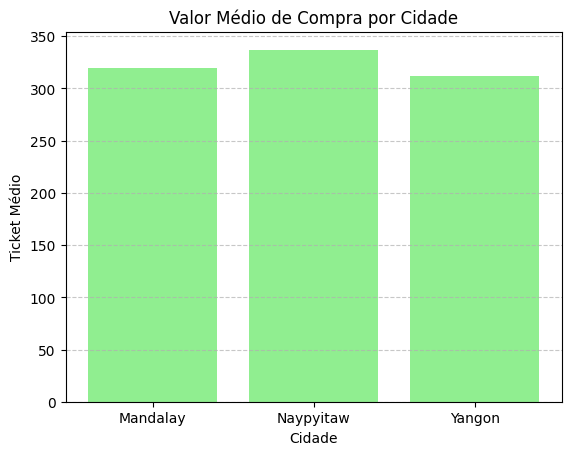

In [7]:
resultado = df1.loc[:, ['City', 'Total']].groupby('City').mean().reset_index()
display(resultado)
plt.bar(resultado['City'], resultado['Total'], color='lightgreen')
plt.title('Valor Médio de Compra por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Ticket Médio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Qual método de pagamento é mais usado?

In [10]:
resultado = df1.loc[:, ['Payment', 'Invoice ID']].groupby('Payment').count().reset_index()
resultado.rename(columns={'Invoice ID': 'Quantidade de Compras'}, inplace=True)
display(resultado)
# gráfico não funcionou, mas para valores tão próximos não parece bom

,Payment,Quantidade de Compras
0,Cash,344
1,Credit card,311
2,Ewallet,345


5. Clientes que usam cartões ou dinheiro gastam mais em média?

In [12]:
resultado = df1.loc[:, ['Payment', 'Total']].groupby('Payment').mean().reset_index()

display(resultado)

,Payment,Total
0,Cash,326.181890
1,Credit card,324.009878
2,Ewallet,318.820600
